<h1>Simulator</h1>

<p>This notebook is meant to demonstrate the functionality of the simulator. I will provide a series of code examples along with visualizations to demonstrate what it enables</p>

<h2>Import packages</h2>

In [1]:
import os
from PIL import Image
import numpy as np
import trimesh
import warnings
# warnings.filterwarnings("ignore")

import meshplot as mp
from pterotactyl.simulator.scene import sampler
from pterotactyl.simulator.physics import grasping
from pterotactyl.utility import utils
import pterotactyl.objects as objects



pybullet build time: Jan 29 2025 23:19:57


<h2>Select object</h2>

In [8]:
OBJ_LOCATION = os.path.join(os.path.dirname(objects.__file__), "test_objects/1")
batch = [OBJ_LOCATION]

<h2>Visualize object to be touched (OPTIONAL)</h2>

In [9]:
verts, faces = utils.load_mesh_touch(OBJ_LOCATION + '.obj')
plot = mp.plot(verts.data.cpu().numpy(), faces.data.cpu().numpy())

Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(0.0, 0.0,…

<h2> Start the simulator and load the batch </h2>

Here we setup the grasping environment, indicating that the batchsize is 1, that we want vision signals outputted, and that the resolution of the images should be 256 by 256. We then load the object into the simulator, and set the object scale to be 1/2.6 .

In [10]:
s = sampler.Sampler(grasping.Agnostic_Grasp, bs=1, vision=True, resolution = [256, 256])
s.load_objects(batch, from_dataset=False, scale = 2.6)

<h2> Perform an action </h2>

In [11]:
action = [30]
parameters = [[[.3, .3, .3], [60, 0, 135]]]
signals = s.sample(action, touch=True, touch_point_cloud=True, vision=True, vision_occluded=True,parameters=parameters )

/home/yz8733/Github/Active-3D-Vision-and-Touch/pterotactyl/simulator/scene/instance.py:278: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /opt/conda/conda-bld/pytorch_1666642991888/work/torch/csrc/utils/tensor_new.cpp:230.)
  frame = {"pos": torch.FloatTensor(positions), "rot_M": torch.FloatTensor(rots)}


<h2> Observe results </h2>

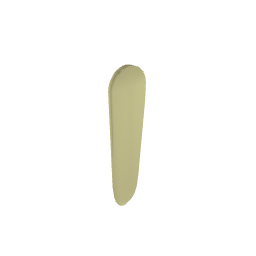

In [12]:
img_vision = Image.fromarray(signals["vision"][0])
display(img_vision)


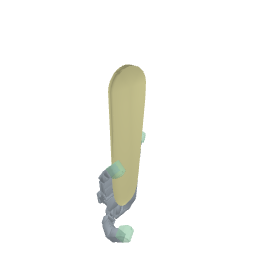

In [15]:
img_vision_grasp = Image.fromarray(signals["vision_occluded"][0])
display(img_vision_grasp)

Finger 0 has status touch
Finger 1 has status touch
Finger 2 has status no_touch
Finger 3 has status no_touch
 
     TOUCH         DEPTH


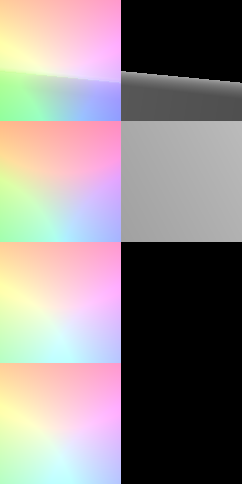

In [13]:
image = np.zeros((121*4, 121*2, 3)).astype(np.uint8)
for i in range(4):
    print(f'Finger {i} has status {signals["touch_status"][0][i]}')
    touch = signals["touch_signal"][0][i].data.numpy().astype(np.uint8)
    image[i*121:i*121+121, :121] = touch
    depth = utils.visualize_depth(signals["depths"][0][i].data.numpy()).reshape(121, 121, 1)
    image[i*121:i*121+121, 121:] = depth
print(' ')
print('     TOUCH         DEPTH')
display(Image.fromarray(image))


<h2> Visualize the touches </h2>

In [14]:
points = []
plot = mp.plot(verts.data.cpu().numpy(), faces.data.cpu().numpy())
for p in signals["touch_point_cloud"][0]:
    if p.shape[0] >0:
        points.append(p)
points = np.concatenate(points).reshape(-1,3)

plot.add_points(points, c=points.sum(axis=1),  shading={ "point_size": 0.03})


Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(0.0, 0.0,…

1

<h2> Perfrom new actions </h2>

In [9]:
action = [40]
parameters = [[[0.35, -0.35, 0.3], [60, 0, 45]]]
signals = s.sample(action, touch=True, touch_point_cloud=False, vision=True, vision_occluded=True,parameters=parameters )

<h2> Observe new results </h2>

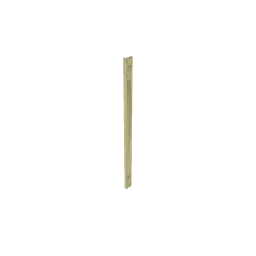

In [11]:
img_vision = Image.fromarray(signals["vision"][0])
display(img_vision)

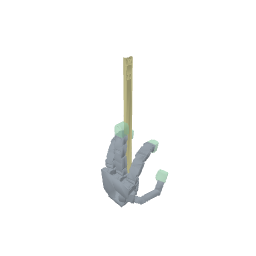

In [10]:
img_vision_grasp = Image.fromarray(signals["vision_occluded"][0])
display(img_vision_grasp)

Finger 0 has status no_touch
Finger 1 has status touch
Finger 2 has status no_touch
Finger 3 has status no_touch
 
     TOUCH         DEPTH


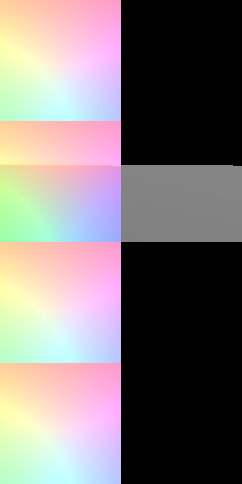

In [12]:
image = np.zeros((121*4, 121*2, 3)).astype(np.uint8)
for i in range(4):
    print(f'Finger {i} has status {signals["touch_status"][0][i]}')
    touch = signals["touch_signal"][0][i].data.numpy().astype(np.uint8)
    image[i*121:i*121+121, :121] = touch
    depth = utils.visualize_depth(signals["depths"][0][i].data.numpy()).reshape(121, 121, 1)
    image[i*121:i*121+121, 121:] = depth
          
print(' ')
print('     TOUCH         DEPTH')
display(Image.fromarray(image))

In [24]:
def dump_joint_map(pb, hand):
    n = pb.getNumJoints(hand)
    for j in range(n):
        ji = pb.getJointInfo(hand, j)
        joint_name = ji[1].decode("utf-8")
        link_name  = ji[12].decode("utf-8")  # child link
        print(f"{j:02d}  joint={joint_name:24s}  link={link_name}")

# Example usage (in your sim setup after loading the hand body):
dump_joint_map(pb, hand)


00  joint=joint_8.0                 link=link_8.0
01  joint=joint_9.0                 link=link_9.0
02  joint=joint_10.0                link=link_10.0
03  joint=joint_11.0                link=link_11.0
04  joint=joint_11.0_tip            link=link_11.0_tip
05  joint=end_joint_0               link=end_0
06  joint=end_cam_joint_0           link=end_cam_0
07  joint=joint_4.0                 link=link_4.0
08  joint=joint_5.0                 link=link_5.0
09  joint=joint_6.0                 link=link_6.0
10  joint=joint_7.0                 link=link_7.0
11  joint=joint_7.0_tip             link=link_7.0_tip
12  joint=end_joint_1               link=end_1
13  joint=end_cam_joint_1           link=end_cam_1
14  joint=joint_0.0                 link=link_0.0
15  joint=joint_1.0                 link=link_1.0
16  joint=joint_2.0                 link=link_2.0
17  joint=joint_3.0                 link=link_3.0
18  joint=joint_3.0_tip             link=link_3.0_tip
19  joint=end_joint_2               lin

In [23]:
import pybullet as pb
import pybullet_data
import time

# 1. Connect to PyBullet (headless since you're on SSH)
pb.connect(pb.DIRECT)    # or pb.GUI if you want a window locally

# 2. Set search path so PyBullet finds standard URDFs
pb.setAdditionalSearchPath(pybullet_data.getDataPath())

# 3. Load your environment / hand URDF
plane = pb.loadURDF("plane.urdf")

# 👇 This is the part specific to this repo
# They provide a dexterous hand URDF in the assets (probably under data/ or models/)
# You need to adjust the path to match what's in this repo:
hand = pb.loadURDF("../pterotactyl/objects/hand/allegro_hand.urdf",
                   basePosition=[0, 0, 0],
                   useFixedBase=True)

# Now pb is your physics client, and `hand` is the body unique ID.


In [22]:
pwd

'/home/yz8733/Github/Active-3D-Vision-and-Touch/notebook'

In [25]:
import pybullet as pb, pybullet_data
pb.connect(pb.DIRECT)
pb.setAdditionalSearchPath(pybullet_data.getDataPath())
plane = pb.loadURDF("plane.urdf")

hand = pb.loadURDF("../pterotactyl/objects/hand/parallel_2pad.urdf",
                   basePosition=[0,0,0], useFixedBase=True)

# Resolve indices once
jmap = {pb.getJointInfo(hand,j)[1].decode(): j for j in range(pb.getNumJoints(hand))}
left_j  = jmap["left_slide"]
right_j = jmap["right_slide"]

def set_jaw_width(width_m):
    # width is distance between pads; each slides by width/2 in opposite directions
    half = width_m/2.0
    pb.setJointMotorControl2(hand, left_j,  pb.POSITION_CONTROL, targetPosition=-half)
    pb.setJointMotorControl2(hand, right_j, pb.POSITION_CONTROL, targetPosition=+half)
    for _ in range(5): pb.stepSimulation()


pybullet build time: Jan 29 2025 23:19:57


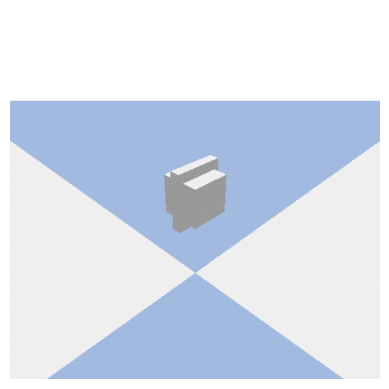

In [1]:
import pybullet as pb
import pybullet_data
import numpy as np
import matplotlib.pyplot as plt

# 1. Fresh start: connect + clear scene
pb.connect(pb.DIRECT)
pb.resetSimulation()  # remove any previous bodies
pb.setAdditionalSearchPath(pybullet_data.getDataPath())

# 2. (Optional) add a plane for reference
pb.loadURDF("plane.urdf")

# 3. Load your gripper URDF
gripper = pb.loadURDF("../pterotactyl/objects/hand/parallel_2pad.urdf",
                      basePosition=[0, 0, 0.1],
                      useFixedBase=True)

# 4. Camera setup
cam_target = [0, 0, 0.1]
view_matrix = pb.computeViewMatrixFromYawPitchRoll(
    cameraTargetPosition=cam_target,
    distance=0.3, yaw=45, pitch=-30, roll=0, upAxisIndex=2
)
proj_matrix = pb.computeProjectionMatrixFOV(
    fov=60, aspect=1.0, nearVal=0.01, farVal=1.0
)

# 5. Render headless
w,h,rgba,depth,seg = pb.getCameraImage(
    width=512, height=512,
    viewMatrix=view_matrix, projectionMatrix=proj_matrix,
    renderer=pb.ER_TINY_RENDERER
)

# 6. Show image inline
img = np.reshape(rgba, (h, w, 4)) / 255.0
plt.imshow(img)
plt.axis("off")
plt.show()

#pb.disconnect()


0 left_slide → link: left_pad
1 right_slide → link: right_pad


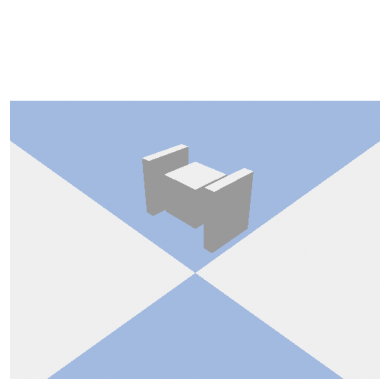

In [7]:
# Get joint indices
n_joints = pb.getNumJoints(gripper)
for j in range(n_joints):
    info = pb.getJointInfo(gripper, j)
    print(j, info[1].decode("utf-8"), "→ link:", info[12].decode("utf-8"))

# Let's open the jaws to 4 cm apart
half = 9.02  # 2 cm per side
pb.setJointMotorControl2(gripper, 0, pb.POSITION_CONTROL, targetPosition=-half)
pb.setJointMotorControl2(gripper, 1, pb.POSITION_CONTROL, targetPosition=+half)

# Step the sim to apply
for _ in range(100):
    pb.stepSimulation()

# Re-render
w,h,rgba,_,_ = pb.getCameraImage(
    512, 512, viewMatrix=view_matrix,
    projectionMatrix=proj_matrix, renderer=pb.ER_TINY_RENDERER
)
img = np.reshape(rgba, (h,w,4)) / 255.0
plt.imshow(img); plt.axis("off"); plt.show()


### This part above is for sanity check, the part below is after I put the urdf of the parellel fingers in, and grasping movement in the code

In [27]:
import os, glob
import numpy as np
import pybullet as pb
import pybullet_data
import matplotlib.pyplot as plt

# Clean start
if pb.isConnected():
    pb.disconnect()
pb.connect(pb.DIRECT)
pb.resetSimulation()
pb.setAdditionalSearchPath(pybullet_data.getDataPath())

# (Optional) ground for reference
#pb.loadURDF("plane.urdf")

# Load YOUR 2-pad gripper URDF
gripper = pb.loadURDF(
    "../pterotactyl/objects/hand/parallel_2pad.urdf",  # <-- adjust if needed
    basePosition=[0, 0, 0.1],
    useFixedBase=True
)

# Resolve joint indices by name
jmap = {pb.getJointInfo(gripper, j)[1].decode(): j for j in range(pb.getNumJoints(gripper))}
left_j  = jmap["left_slide"]
right_j = jmap["right_slide"]

# Quick sanity: open a little so pads are visible
pb.setJointMotorControl2(gripper, left_j,  pb.POSITION_CONTROL, targetPosition=+0.01)
pb.setJointMotorControl2(gripper, right_j, pb.POSITION_CONTROL, targetPosition=-0.01)
for _ in range(50): pb.stepSimulation()

print("Loaded gripper. Joints:", jmap)


Loaded gripper. Joints: {'left_slide': 0, 'right_slide': 1}


In [28]:
# Import your class from the repo (after you added it to grasping.py)
from pterotactyl.simulator.physics.grasping import Parallel_Gripper_Simple

# Simple headless camera
cam_target = [0, 0, 0.1]
view_matrix = pb.computeViewMatrixFromYawPitchRoll(
    cameraTargetPosition=cam_target, distance=0.55, yaw=45, pitch=-25, roll=0, upAxisIndex=2
)
proj_matrix = pb.computeProjectionMatrixFOV(fov=60, aspect=1.0, nearVal=0.01, farVal=2.0)

def render_and_show():
    w, h, rgba, _, _ = pb.getCameraImage(
        width=640, height=640, viewMatrix=view_matrix,
        projectionMatrix=proj_matrix, renderer=pb.ER_TINY_RENDERER
    )
    img = np.reshape(rgba, (h, w, 4)) / 255.0
    plt.imshow(img)
    plt.axis("off")
    plt.show()


In [29]:
import torch
import trimesh
from pathlib import Path

# Try to find an .obj under the repo's data folder
candidates = []
for root in ["../pterotactyl/objects/test_objects"]:
    if Path(root).exists():
        candidates += glob.glob(os.path.join(root, "**", "*.obj"), recursive=True)

assert len(candidates) > 0, "Couldn't find any .obj files under data/. Adjust the path/glob."

obj_path = sorted(candidates)[0]
print("Using object:", obj_path)

# Load mesh with trimesh (centered around origin is ideal)
mesh = trimesh.load(obj_path, force='mesh')
if not mesh.is_watertight:
    mesh = mesh.convex_hull  # ensure hull exists

verts = torch.tensor(np.asarray(mesh.vertices), dtype=torch.float32)
faces = torch.tensor(np.asarray(mesh.faces), dtype=torch.long)  # not strictly used by set_object()
print("Mesh verts:", verts.shape, "faces:", faces.shape)


Using object: ../pterotactyl/objects/test_objects/0.obj
Mesh verts: torch.Size([242, 3]) faces: torch.Size([544, 3])


Placed & grasped: True


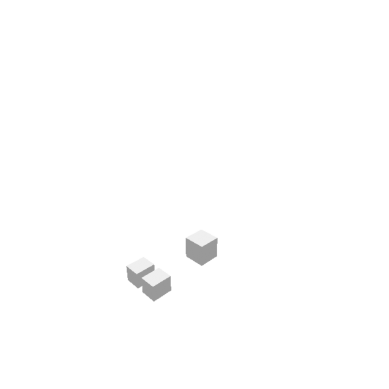

In [30]:
# Instantiate the simple gripper that reuses hull placement
pg = Parallel_Gripper_Simple(pb, gripper, left_j, right_j)

# Give it the object geometry (for hull/ray intersection math)
pg.set_object(verts, faces)

# Choose an "action" (index on their 50-point circle). Try a few directions.
action = 18  # try 0..49
jaw_width = 0.04  # meters (i.e., 3 cm opening)

ok = pg.grasp(action=action, jaw_width=jaw_width)
print("Placed & grasped:", ok)

# Step a little and render
for _ in range(60): pb.stepSimulation()
render_and_show()


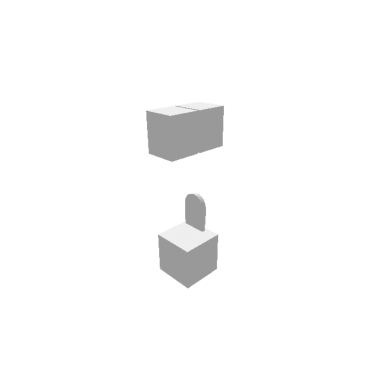

Saved /home/yz8733/Github/Active-3D-Vision-and-Touch/notebook/gripper_preview.png


In [31]:
# %% one-and-done visualizer cell
import os, glob, numpy as np, torch, trimesh, matplotlib.pyplot as plt
import pybullet as pb, pybullet_data

# -- fresh scene --
if pb.isConnected(): pb.disconnect()
pb.connect(pb.DIRECT)
pb.resetSimulation()
pb.setAdditionalSearchPath(pybullet_data.getDataPath())
#pb.loadURDF("plane.urdf")

# -- find an object mesh from your downloaded data --
candidates = []
for root in ["../pterotactyl/objects/test_objects"]:
    if os.path.exists(root):
        candidates += glob.glob(os.path.join(root, "**", "*.obj"), recursive=True)
assert candidates, "No .obj found under data/. Adjust search roots."
OBJ_PATH = sorted(candidates)[3]

# -- scale object to ~10 cm bbox, spawn as visual body --
mesh = trimesh.load(OBJ_PATH, force="mesh")
if not mesh.is_watertight: mesh = mesh.convex_hull
bbox = mesh.bounding_box.extents
max_extent = float(np.max(bbox)); scale = (0.10 / max_extent) if max_extent > 0 else 1.0
vis = pb.createVisualShape(pb.GEOM_MESH, fileName=OBJ_PATH, meshScale=[scale]*3)
obj_body = pb.createMultiBody(baseMass=0, baseVisualShapeIndex=vis, basePosition=[0,0,0])

# -- load your 2-pad gripper --
GRIPPER_URDF = "../pterotactyl/objects/hand/parallel_2pad.urdf"
gripper = pb.loadURDF(GRIPPER_URDF, basePosition=[0,0,0.1], useFixedBase=True)
jmap = {pb.getJointInfo(gripper, j)[1].decode(): j for j in range(pb.getNumJoints(gripper))}
left_j, right_j = jmap["left_slide"], jmap["right_slide"]

# -- import your gripper class & prep object tensors for hull math --
from pterotactyl.simulator.physics.grasping import Parallel_Gripper_Simple
verts = torch.tensor(np.asarray(mesh.vertices)*scale, dtype=torch.float32)
faces = torch.tensor(np.asarray(mesh.faces), dtype=torch.long)

pg = Parallel_Gripper_Simple(pb, gripper, left_j, right_j)
pg.set_object(verts, faces)

# -- place gripper (action=0..49) and set jaw width --
ok = pg.grasp(action=7, jaw_width=0.03)  # tweak action and width
for _ in range(60): pb.stepSimulation()

# -- camera + render inline AND save to file --
cam_target = [0, 0, 0.05]
view = pb.computeViewMatrixFromYawPitchRoll(cam_target, distance=0.30, yaw=45, pitch=-25, roll=0, upAxisIndex=2)
proj = pb.computeProjectionMatrixFOV(fov=60, aspect=1.0, nearVal=0.01, farVal=2.0)
W,H = 640,640
w,h,rgba,_,_ = pb.getCameraImage(W,H,viewMatrix=view,projectionMatrix=proj,renderer=pb.ER_TINY_RENDERER)
img = np.reshape(rgba, (h,w,4)) / 255.0

plt.imshow(img); plt.axis("off"); plt.show()

# also save to disk so you can confirm even if the inline display hiccups
out = "gripper_preview.png"
import imageio.v2 as imageio
imageio.imwrite(out, (img*255).astype("uint8"))
print("Saved", os.path.abspath(out))


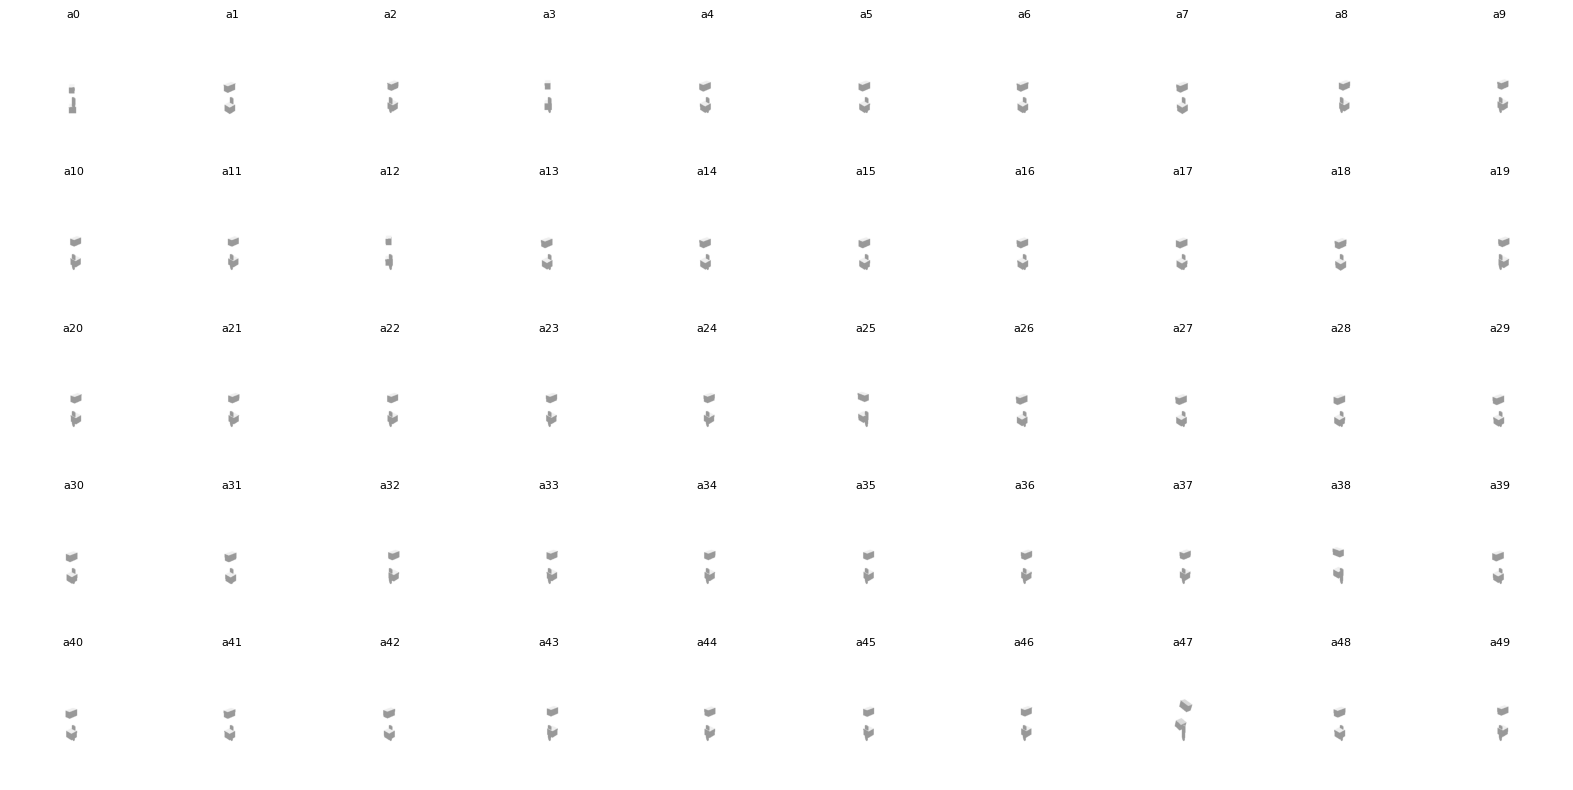

In [32]:
# Parameters
JAW_WIDTH = 0.03   # 3 cm opening; change as you like
GRID_R, GRID_C = 5, 10  # 5x10 grid for 50 poses
assert GRID_R * GRID_C == 50

imgs = []
for action in range(50):
    # place gripper for this action and open to JAW_WIDTH
    ok = pg.grasp(action=action, jaw_width=JAW_WIDTH)
    if not ok:
        # If no hull hit (rare), keep previous pose but still render
        pass
    for _ in range(8): pb.stepSimulation()
    imgs.append(render_rgb())

# Show as a grid
fig, axes = plt.subplots(GRID_R, GRID_C, figsize=(GRID_C*1.6, GRID_R*1.6))
k = 0
for r in range(GRID_R):
    for c in range(GRID_C):
        axes[r,c].imshow(imgs[k])
        axes[r,c].set_title(f"a{k}", fontsize=8)
        axes[r,c].axis("off")
        k += 1
plt.tight_layout()
plt.show()
